#### ALGORITMO DE FILTRO GAUSSIANO TRANSFORMADO

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Cargamos la imagen en escala de grises
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
h, w = img.shape

In [26]:
# Definimos una funcion que, dado el tamaño de la imagen y del kernel + sigma, devuelve un kernel gaussiano en espacio espacial y el mismo en espacio espectral
def create_gauss_filter(h, w, k_size, sigma):

    canvas = np.zeros((h, w))
    gaussian_kernel = cv.getGaussianKernel(k_size,sigma)
    gaussian_kernel = gaussian_kernel * gaussian_kernel.T
    
    center_x = int(canvas.shape[1]/2)
    center_y = int(canvas.shape[0]/2)
    
    kernel = canvas
    kernel[center_y-int(k_size/2):center_y+int(k_size/2)+1, center_x-int(k_size/2):center_x+int(k_size/2)+1] = gaussian_kernel

    kernel_tf = np.fft.fft2(kernel)
    
    return kernel, kernel_tf

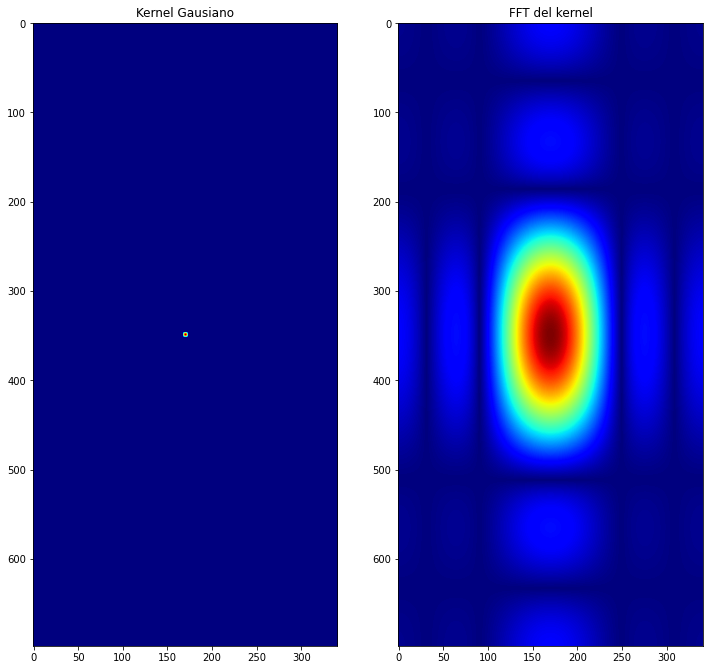

In [37]:
# Aplicamos la funcion y ploteamos los kernel espacial y espectral
kernel, kernel_tf = create_gauss_filter(h, w, k_size=5, sigma=2)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('on')
plt.title("FFT del kernel")
plt.imshow(np.fft.fftshift(np.abs(kernel_tf)), cmap='jet')

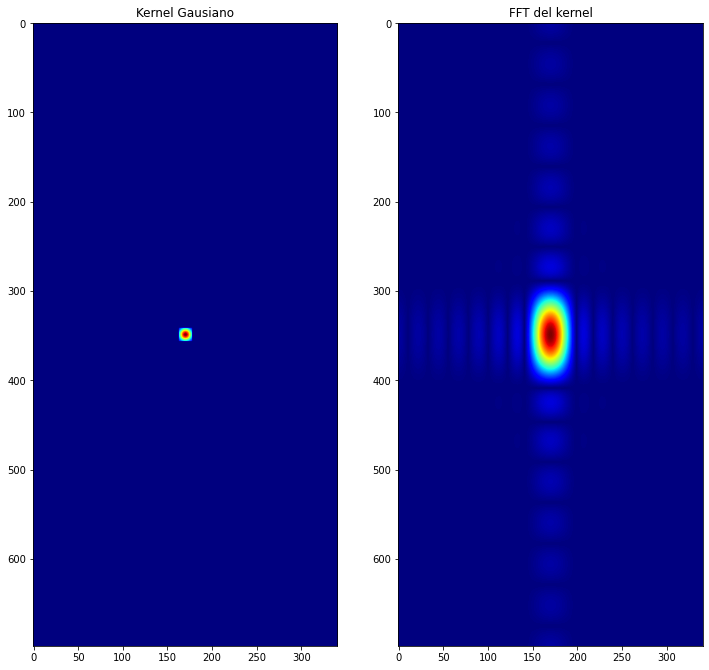

In [41]:
# Aplicamos nuevamente para otro tamaño de Kernel y sigma
kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=5)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('on')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('on')
plt.title("FFT del kernel")
plt.imshow(np.fft.fftshift(np.abs(kernel_tf)), cmap='jet')

Text(0.5, 1.0, 'Desenfoque gausiano en FFT')

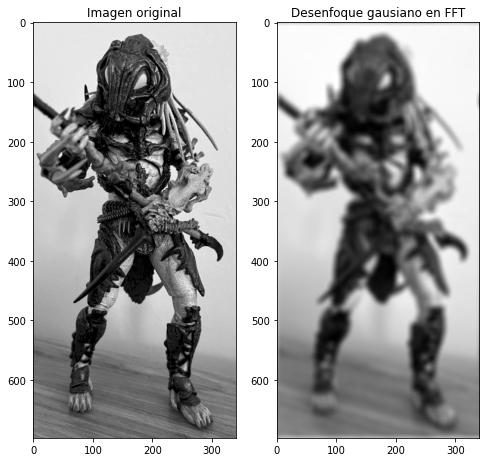

In [39]:
# Aplicamos el kernel espectral a nuestra imagen para generar un desenfoque
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

#img_gauss = np.real(np.fft.ifft2(np.fft.ifftshift(filtered)))
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano en FFT')

Text(0.5, 1.0, 'Desenfoque gausiano Convolucion')

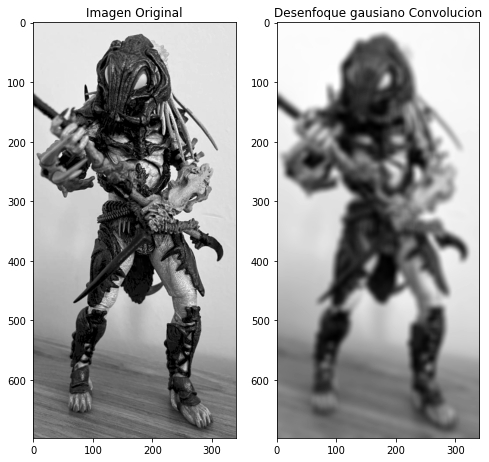

In [40]:
# Hacemos un blur gaussiano por convolucion con el mismo tamaño de kernel y sigama para comparar los resultados
img_blur = cv.GaussianBlur(img, (15,15), 5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1,2,2)
plt.imshow(img_blur, cmap='gray')
plt.title('Desenfoque gausiano Convolucion')

Observamos que ambos metodos (en dominio espectral y por convolucion en dominio espacial) generan el mismo resultado, por lo tanto concluimos que la funcion implementada funciona correctamente.